In [1]:
.libPaths("/home/tbellagio/miniforge3/envs/r-environment")
library(devtools) # Needed to install the PicMin package from Tom's GitHub install_github("TBooker/PicMin", force = T)
.libPaths("/home/tbellagio/miniforge3/envs/r-environment/lib/R/library")
library(PicMin)
library(tidyverse)
library(poolr)

Loading required package: usethis

Warning message:
“package ‘PicMin’ was built under R version 4.3.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.3.0”
Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.0”
Warning message:
“package ‘tidyr’ was built under R version 4.3.2”
Warning message:
“package ‘readr’ was built under R version 4.3.2”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”
Warning message:
“package ‘forcats’ was built under R version 4.3.0”
Warning message:
“package ‘lubridate’ was built under R version 4.3.1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ d

In [2]:
lin_1 <- read.csv("lineage_1.csv") 
lin_3 <- read.csv("lineage_3.csv") 
lin_5 <- read.csv("lineage_5.csv") 
lin_6 <- read.csv("lineage_6.csv") 
lin_7 <- read.csv("lineage_7.csv")

In [3]:
lin_1$emp_p <- PicMin:::EmpiricalPs(lin_1$FstH, large_i_small_p=TRUE) 
lin_3$emp_p <- PicMin:::EmpiricalPs(lin_3$FstH, large_i_small_p=TRUE) 
lin_5$emp_p <- PicMin:::EmpiricalPs(lin_5$FstH, large_i_small_p=TRUE) 
lin_6$emp_p <- PicMin:::EmpiricalPs(lin_6$FstH, large_i_small_p=TRUE) 
lin_7$emp_p <- PicMin:::EmpiricalPs(lin_7$FstH, large_i_small_p=TRUE)

In [6]:
write.csv(lin_1, "lin_1_pvalues.csv", row.names = FALSE)
write.csv(lin_3, "lin_3_pvalues.csv", row.names = FALSE)
write.csv(lin_5, "lin_5_pvalues.csv", row.names = FALSE)
write.csv(lin_6, "lin_6_pvalues.csv", row.names = FALSE)
write.csv(lin_7, "lin_7_pvalues.csv", row.names = FALSE)

In [7]:
## quick function for getting names - this is included in the PicMin package too 
get_names <- function( lineage_df ){
  return( paste( lineage_df$scaff, lineage_df$start,
                 sep = "_") )
}
lin_1$name <- get_names( lin_1 )
lin_3$name <- get_names( lin_3 )
lin_5$name <- get_names( lin_5 )
lin_6$name <- get_names( lin_6 )
lin_7$name <- get_names( lin_7 )

In [9]:
## quick function for minimising the dataframes - this is included in the PicMin package too
min_lin <- function( lineage_df , lineage_name){
  tmp <- data.frame( emp_p = lineage_df$emp_p,
                     window = lineage_df$name)
  names(tmp) <- c(lineage_name,
                  "window")
  return( tmp )
}
lin_1_m <- min_lin( lin_1, "lineage_1" )
lin_3_m <- min_lin( lin_3, "lineage_3" )
lin_5_m <- min_lin( lin_5, "lineage_5" )
lin_6_m <- min_lin( lin_6, "lineage_6" ) 
lin_7_m <- min_lin( lin_7, "lineage_7" )

In [11]:
#put all data frames into list
df_list <- list(lin_1_m,
                lin_3_m,
                lin_5_m,
                lin_6_m,
                lin_7_m)
#merge all data frames in list - use the 'window' variable to merge 
all_lins <- df_list %>% reduce(full_join, by='window')
# remove the column named "window"
all_lins_p <- all_lins[ , !(names(all_lins) %in% c("window"))]
# Use the "window" column as row.names
rownames(all_lins_p) <- all_lins$window
head(all_lins_p, n = 5)

,lineage_1,lineage_3,lineage_5,lineage_6,lineage_7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
scaffold_5_6000,0.01727878,0.158841010,0.07537001,0.30631754,0.03794417
scaffold_5_7000,0.10023188,0.123254086,0.02308559,0.32969659,0.06438069
scaffold_5_15000,0.03642756,0.003937593,0.47176641,0.08832086,0.21895654
scaffold_5_16000,0.07278031,0.031426449,0.11438224,0.23566085,0.75717285
scaffold_5_17000,0.10801107,0.021916790,0.09588160,0.06629260,0.62584558


In [12]:
nLins = 5
n = 5 # corresponds to the number of lineages present (i.e. no missing data)
# Run 10,000 replicate simulations of this situation and build the correlation matrix for the order statistics from them
emp_p_null_dat <- t(replicate(4000, PicMin:::GenerateNullData(1.0, n, 0.5, 3,10000)))

In [13]:
# Calculate the order statistics' p-values for each simulation
emp_p_null_dat_unscaled <- t(apply(emp_p_null_dat ,1, PicMin:::orderStatsPValues))
# Take a look at the p-values - aren't they nice?
head(emp_p_null_dat_unscaled)
# Use those p-values to construct the correlation matrix

0.77498693,0.5564874,0.2909591,0.7472731
0.09697741,0.2148893,0.0495301,0.0159918
0.49977658,0.4251343,0.6887757,0.3116204
0.61651375,0.8608852,0.6879385,0.8420447
0.91652029,0.7552839,0.4591945,0.7472731
0.50160088,0.2910182,0.8752311,0.6728059


In [14]:
null_pMax_cor_unscaled <- cor( emp_p_null_dat_unscaled ) 
null_pMax_cor_unscaled

1.0000000,0.6893531,0.4780256,0.2979545
0.6893531,1.0000000,0.7070081,0.4350146
0.4780256,0.7070081,1.0000000,0.6131700
0.2979545,0.4350146,0.6131700,1.0000000


In [15]:
null_pMax_cor_unscaled

1.0000000,0.6893531,0.4780256,0.2979545
0.6893531,1.0000000,0.7070081,0.4350146
0.4780256,0.7070081,1.0000000,0.6131700
0.2979545,0.4350146,0.6131700,1.0000000


In [16]:
dim(all_lins_p)

[1] 14090     5

In [17]:
# Select the loci that have data for exactly 7 lineages
lins_p_5 <-  as.matrix(all_lins_p[rowSums(is.na(all_lins_p)) == nLins-n,])

In [18]:
dim(lins_p_5)

[1] 9198    5

In [19]:
# Make some containers for the PicMin results
resulting_p <- rep(-1,
             nrow(lins_p_5))
resulting_n <- rep(-1,
             nrow(lins_p_5))

In [14]:

numReps = 100 # This is an important parameter - the larger the better, but larger values mean longer run times.
# For each of the lines in the dataframe, perform PicMin
for (i in seq(nrow(lins_p_5)) ){
    test_result <- PicMin:::PicMin(na.omit(lins_p_5[i,]),
                                   null_pMax_cor_unscaled, 
                                   numReps = numReps)
    # Store the p-value
    resulting_p[i] <- test_result$p
    resulting_n[i] <- test_result$config_est
}
lins_p_5_result = data.frame(numLin = n ,
                                p = resulting_p,
                                q = p.adjust(resulting_p, method = "fdr"),
                                n_est = resulting_n,
                                locus = row.names(lins_p_5) )
picMin_results <- cbind( lins_p_5_result,
                         read.csv(text=row.names(lins_p_5), 
                                  header=FALSE, 
                                  sep = "_",
                                  col.names=c('redundan','scaffold','start'))
)

In [17]:
write.csv(picMin_results, "picMin_results_example.csv", row.names = FALSE)

In [2]:
picMin_results <- read.csv("picMin_results_example.csv") 

In [4]:
library(ggplot2)
library(cowplot)
col_pal <- c("white", "#8ec641", "#897696", "#e93826", "#13a4f5", "#f89b56")

Warning message:
“package ‘cowplot’ was built under R version 4.3.3”

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




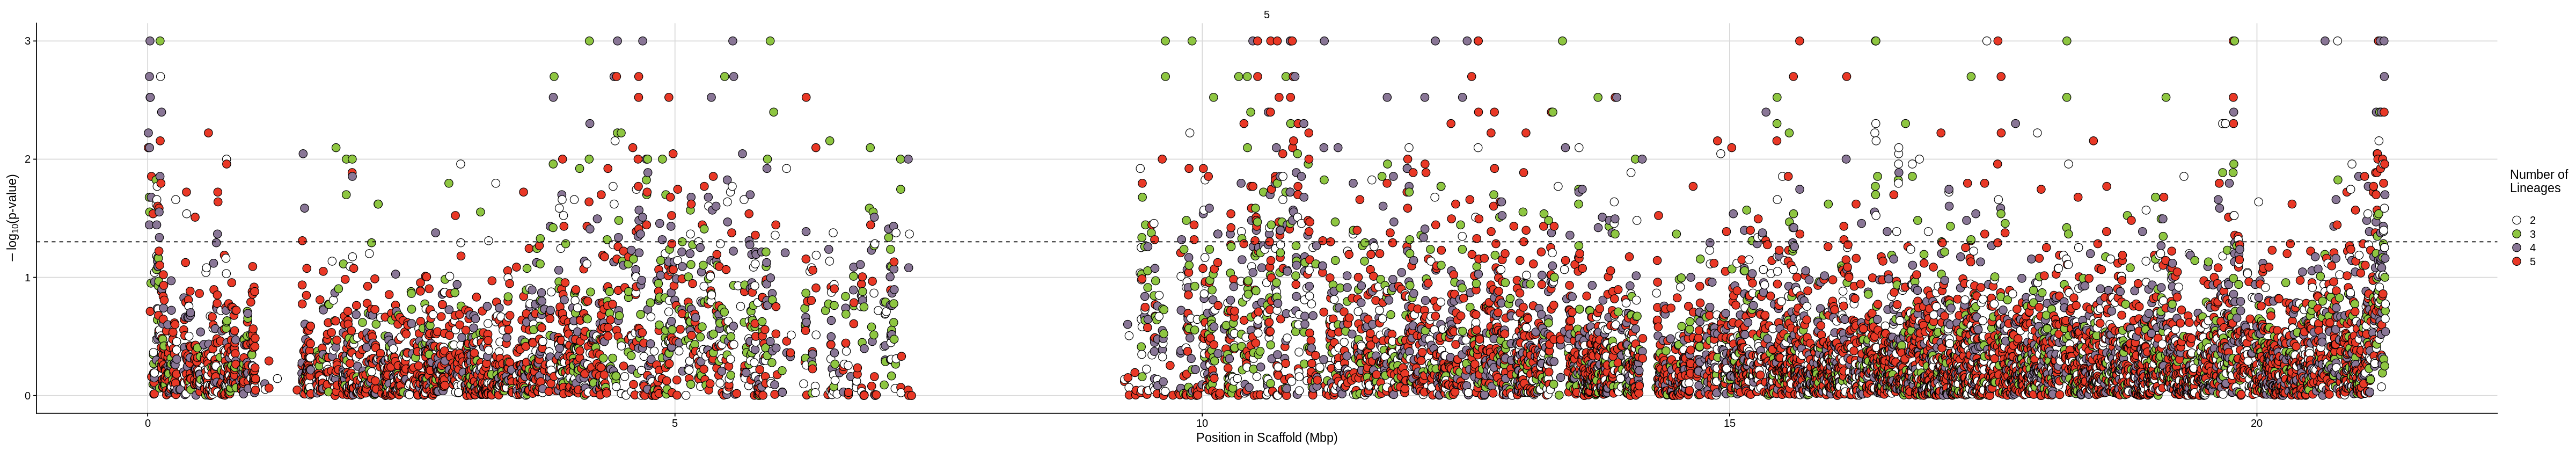

In [9]:
options(repr.plot.width = 40, repr.plot.height = 7)

ggplot(data = picMin_results,
       aes(x = start/1e6,
           y = -log10(p),
           fill = factor(n_est)))+
  geom_point(shape = 21,
             size = 4)+
  geom_hline(aes(yintercept = -log10(0.05)),
             lty=2)+
  facet_wrap(~scaffold,
             ncol = 4,
             scales = "free_x")+
  scale_fill_manual("Number of\nLineages\n",values = col_pal)+   scale_y_continuous(expression(-log[10]*"(p-value)"))+
  scale_x_continuous("Position in Scaffold (Mbp)")+
  theme_half_open() +
  theme(strip.background = element_blank())+
  background_grid()# always place this after the theme